In [6]:
import torch
import numpy as np
import pandas as pd
from pathlib import Path 
from tqdm import tqdm
from Spektro.MassGenie.spectra_process_utils import preprocess_spectra, preprocess_spectrum, msp_file_to_pkl


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from tokenizers import Tokenizer
tokenizer_path = "Spektro/MassGenie/tokenizer/bbpe_tokenizer/bart_bbpe_1M_tokenizer.model"
tokenizer = Tokenizer.from_file(tokenizer_path)

In [174]:
from Spektro.MassGenie.dataset import SpectroDataset, SpectroDataCollator

data_range = range(0, 10) ####!!!!!########
data_path = "Spektro/MassGenie/data/datasets/DEBUG/DEBUG_valid.pkl"
dataset = SpectroDataset(data_path, eval_mode=True)#[0:20] ####!!!!!########
subset = torch.utils.data.Subset(dataset, data_range) ####!!!!!########
loader = torch.utils.data.DataLoader(subset,
                                     batch_size=5,
                                     collate_fn=SpectroDataCollator(eval_mode=True),
                                     drop_last=False,
                                     shuffle=False)


[autoreload of Spektro.MassGenie.spectra_process_utils failed: Traceback (most recent call last):
  File "/storage/brno2/home/ahajek/miniconda3/envs/BARTtrain/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/storage/brno2/home/ahajek/miniconda3/envs/BARTtrain/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/storage/brno2/home/ahajek/miniconda3/envs/BARTtrain/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/storage-brno2/home/ahajek/Spektro/MassGenie/spectra_process_utils.py", line 179, in <module>
    def msp_file_to_pkl(path_msp: Path,
NameError: name 'Path' is

In [121]:
with open('Spektro/MassGenie/data/datasets/30M/30M_valid.smi', 'w') as f:
    for s in tqdm(data.smiles):
        f.write(s + '\n')

100%|██████████| 1246114/1246114 [00:00<00:00, 3204466.46it/s]


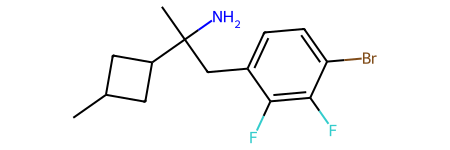

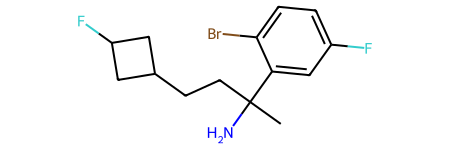

simil: {0.3682266009852217}
prediction smiles: CC1CC(C(C)(N)Cc2ccc(Br)c(F)c2F)C1
gt smiles: FC1CC(C1)CCC(c1cc(F)ccc1Br)(N)C


In [129]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import json
IPythonConsole.ipython_useSVG=True

with open("Spektro/MassGenie/predictions/bart_2023-04-07-18_27_23_30Mneims/DEBUG/1692277311_valid_20:50_ahoj/predictions.jsonl") as f:
    preds = [json.loads(line) for line in f]

n = 0
smiles1 = list(preds[n].keys())[0]
smiles2 = data.iloc[20+n]["smiles"]

mol1 = Chem.MolFromSmiles(smiles1)
display(mol1)

mol2 = Chem.MolFromSmiles(smiles2)
display(mol2)

simil = DataStructs.FingerprintSimilarity(Chem.RDKFingerprint(mol1), Chem.RDKFingerprint(mol2))

print("simil:", {simil})
print("prediction smiles:", smiles1)
print("gt smiles:", smiles2)

In [52]:
list(preds[0].keys())[0]

'CC1CC(C(C)(N)Cc2ccc(Br)c(F)c2F)C1'

### Create .pkl and .smi of NIST datset

In [73]:
from matchms.importing import load_from_msp

In [74]:
%%time
# load NIST20-only 
nist20only_path = "Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NEIMS.msp"
nist20only = list(load_from_msp(nist20only_path, metadata_harmonization=False))

CPU times: user 2min 3s, sys: 459 ms, total: 2min 4s
Wall time: 2min 4s


In [83]:
nist20only[0].intensities

array([999.])

In [84]:
len(nist20only)

86772

In [118]:
msp_file_to_smi(Path("Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NIST.msp"))
msp_file_to_smi(Path("Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NEIMS.msp"))

saving to: Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NIST.smi
saving to: Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NEIMS.smi


In [121]:
msp_file_to_smi(Path("Spektro/MassGenie/data/datasets/NIST/NIST_split_filip/test.msp"))
msp_file_to_smi(Path("Spektro/MassGenie/data/datasets/NIST/NIST_split_filip/train.msp"))

saving to: Spektro/MassGenie/data/datasets/NIST/NIST_split_filip/test.smi


[20:24:58] Explicit valence for atom # 0 C, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:24:58] Explicit valence for atom # 0 B, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:25:01] Explicit valence for atom # 8 Br, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)
saving to: Spektro/MassGenie/data/datasets/NIST/NIST_split_filip/train.smi


[20:30:56] Explicit valence for atom # 0 B, 6, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:00] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[20:31:00] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:01] Explicit valence for atom # 2 C, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:01] Explicit valence for atom # 7 Br, 3, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:02] Explicit valence for atom # 1 Cl, 7, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:03] SMILES Parse Error: syntax error while parsing: [Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6
[20:31:03] SMILES Parse Error: Failed parsing SMILES '[Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6' for input: '[Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6'


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:05] Explicit valence for atom # 18 Br, 3, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:11] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[20:31:11] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:38] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[20:31:38] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:39] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11
[20:31:39] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11' for input: '[CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11'


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:43] Explicit valence for atom # 1 C, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:44] Explicit valence for atom # 0 B, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


[20:31:46] Explicit valence for atom # 0 B, 5, is greater than permitted


Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


In [125]:
# check if the files are the same
nist = Path("Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NIST.smi").open().readlines()
neims = Path("Spektro/MassGenie/data/datasets/NIST/NIST20_only/NIST20_only_NEIMS.smi").open().readlines()

nist == neims # actually True

69787 c1ccc2c(c1)OB(Oc1ccccc1OB1Oc3ccccc3O1)O2
 c1ccc(OB2Oc3ccccc3O2)c(OB2Oc3ccccc3O2)c1

85417 [Cu+2].[Cu+2].[Cu+2].[I-2].[I-2].[I-2]
 [Cu+2].[Cu+2].[Cu+2].[IH-2].[IH-2].[IH-2]



In [130]:
data_msp_DEBUG = nist20only[:100]

In [13]:
dataset_path = Path("Spektro/MassGenie/data/datasets/NIST/NIST_split_filip")
dataset_type = "train"
source_token = "<nist>"
msp_file_to_pkl(dataset_path / f"{dataset_type}.msp",
                tokenizer_path,
                source_token,
                path_pkl=dataset_path / f"{dataset_type}_{source_token}.pkl"
                )


  5%|▍         | 11835/261272 [00:05<02:07, 1963.46it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 12%|█▏        | 31678/261272 [00:15<01:55, 1987.62it/s][12:18:52] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[12:18:52] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'
 12%|█▏        | 32074/261272 [00:16<01:57, 1945.15it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 14%|█▍        | 37694/261272 [00:18<01:53, 1972.23it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 15%|█▌        | 40292/261272 [00:20<01:50, 1992.87it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 17%|█▋        | 44472/261272 [00:22<01:49, 1972.41it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 18%|█▊        | 47465/261272 [00:23<01:47, 1992.66it/s][12:19:00] SMILES Parse Error: syntax error while parsing: [Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6
[12:19:00] SMILES Parse Error: Failed parsing SMILES '[Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6' for input: '[Ni]|1|2(|[S-]C(=C([S-]|1)c3ccccc3)c4ccccc4)|[S-]C(=C([S-]|2)c5ccccc5)c6ccccc6'
 18%|█▊        | 47864/261272 [00:24<01:47, 1983.02it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 22%|██▏       | 57468/261272 [00:28<01:45, 1923.15it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 34%|███▎      | 88000/261272 [00:44<01:29, 1944.75it/s][12:19:21] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[12:19:21] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Mn]6789|2|3|4|5[CH-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'
 34%|███▍      | 88398/261272 [00:44<01:27, 1965.88it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 83%|████████▎ | 217084/261272 [01:54<00:22, 1974.73it/s][12:20:31] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10
[12:20:31] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10' for input: '[CH-]1|2C|3=C|4C|5=C1|[Fe]6789|2|3|4|5|[N-]%10[CH-]6[CH-]7[CH-]8[CH-]9%10'
 83%|████████▎ | 217481/261272 [01:55<00:22, 1967.74it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 85%|████████▌ | 222631/261272 [01:57<00:19, 1941.88it/s][12:20:34] SMILES Parse Error: syntax error while parsing: [CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11
[12:20:34] SMILES Parse Error: Failed parsing SMILES '[CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11' for input: '[CH-]1|2C|3=C|4C|5=C1|[Co]6789|2|3|4|5[CH-]%10B([CH-]6[CH-]7[CH-]8[CH-]9%10)c%11ccccc%11'
 85%|████████▌ | 223026/261272 [01:57<00:19, 1956.15it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 93%|█████████▎| 243110/261272 [02:08<00:09, 1942.95it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 95%|█████████▍| 247048/261272 [02:10<00:07, 1945.87it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


 98%|█████████▊| 256119/261272 [02:15<00:02, 1938.02it/s]

Couldn't be canonicalized due to Exception: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType, bool)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


100%|██████████| 261272/261272 [02:17<00:00, 1897.86it/s]


0 no smiles
456 smiles too long
13 spectra corrupted
6601 spectra w/ too high mz
22209 spectra w/ too many peaks
totally 29279 issues
discarded 26364/261272 spectra 


In [16]:
df = pd.read_pickle(dataset_path / f"valid_<nist>.pkl")
df

,input_ids,position_ids,attention_mask,smiles,labels,decoder_attention_mask
151700,"[39, 45, 57, 63, 69, 77, 89, 93, 100, 101, 105...","[2, 3, 5, 3, 4, 6, 6, 3, 3, 3, 3, 4, 9, 5, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",ClC1=C(c2ccccc2)SCCS1,"[1234, 224, 690, 20, 32, 38, 11, 70, 21, 334, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
136805,"[26, 27, 29, 37, 38, 39, 49, 50, 51, 52, 53, 6...","[0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 3, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",O=C1C=Cc2cccc3c2c1cc1ccccc13,"[1234, 224, 50, 32, 38, 20, 38, 32, 279, 21, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5857,"[39, 41, 43, 53, 55, 57, 65, 67, 77, 79, 91, 9...","[5, 8, 5, 3, 6, 8, 3, 3, 4, 3, 5, 2, 3, 4, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CC(C)(C)c1ccc(C(C)(C)C)c2c1O[P+]1(O2)Oc2c(C(C)...,"[1234, 224, 261, 11, 38, 289, 38, 12, 70, 20, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
146475,"[26, 27, 28, 29, 35, 36, 37, 38, 39, 40, 41, 4...","[0, 3, 2, 4, 0, 2, 0, 0, 3, 0, 6, 4, 6, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CCCCCCCCOC(=O)CCCCC(=O)Oc1c(Cl)cc(Cl)c(Cl)c1Cl,"[1234, 224, 487, 292, 260, 50, 12, 356, 260, 5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
105754,"[25, 26, 27, 28, 29, 30, 38, 39, 40, 41, 42, 4...","[0, 0, 5, 3, 3, 0, 3, 5, 1, 3, 3, 1, 3, 6, 9, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",O=Cc1ccc(N=Nc2ccccc2)cc1,"[1234, 224, 50, 32, 279, 20, 280, 11, 49, 32, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...
110387,"[26, 27, 28, 29, 30, 38, 39, 40, 41, 42, 43, 4...","[0, 3, 0, 2, 0, 0, 2, 0, 5, 1, 6, 0, 0, 4, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CC(C)C(C)C=C[Si](C)(C)F,"[1234, 224, 261, 11, 38, 12, 38, 11, 38, 12, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
127518,"[15, 26, 27, 28, 29, 30, 31, 39, 40, 41, 42, 4...","[0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 4, 3, 6, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CC(C)C=C(O[Si](C)(C)C)C(=O)O[Si](C)(C)C,"[1234, 224, 261, 11, 38, 12, 38, 32, 38, 11, 5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
197470,"[26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 41, 4...","[0, 6, 3, 6, 0, 3, 0, 0, 5, 2, 7, 6, 8, 6, 9, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CCCCCCCC(C)O,"[1234, 224, 1024, 11, 38, 12, 50, 0, -100, -10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
86890,"[41, 42, 44, 50, 51, 52, 53, 54, 55, 56, 57, 5...","[2, 5, 4, 1, 3, 1, 0, 0, 0, 4, 2, 0, 0, 0, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",CC(Cc1ccccc1)N(C)C,"[1234, 224, 261, 11, 279, 20, 334, 20, 12, 49,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [14]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=26000, random_state=42)

train.to_pickle(dataset_path / f"train_<nist>.pkl")
valid.to_pickle(dataset_path / f"valid_<nist>.pkl")

In [4]:
tokenizer.encode("<nist>").ids

[1234]

In [199]:
tokenizer.decode(tokenizer.encode("HH", skip_special_ids=True).ids)

TypeError: Tokenizer.encode() got an unexpected keyword argument 'skip_special_ids'

In [201]:
valid_df = pd.read_pickle("Spektro/MassGenie/data/datasets/30M/30M_valid.pkl")

In [202]:
# zjisti jestli je ve valid_df taky druhej token v labelech 224!!!!!
valid_df.head()

,smiles,input_ids,labels,decoder_attention_mask,encoder_attention_mask,position_ids
16,CCNC(c1cnn2c1OCCC2)CC=C=C,"[26, 27, 28, 30, 38, 39, 40, 41, 42, 43, 44, 4...","[1233, 224, 283, 11, 70, 20, 284, 21, 70, 20, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 6, 5, 5, 5, 9, 8, 9, 9, 7, 9, 8, 6, 3, 7, ..."
19,CCC1CN(C(=O)C)C(CN1C(=O)c1nc2ccccc2cc1Cl)CC,"[36, 38, 39, 40, 41, 42, 43, 44, 49, 50, 51, 5...","[1233, 224, 276, 20, 263, 11, 38, 260, 50, 12,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 6, 5, 7, 8, 8, 6, 3, 1, 5, 4, 6, 6, 5, ..."
50,OC1CNCC1N=c1[nH]c(ncc1[N+](=O)[O-])C(C)(C)C,"[30, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 4...","[1233, 224, 286, 20, 400, 20, 49, 32, 70, 20, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 1, 1, 3, 3, 7, 6, 9, 9, 8, 9, 6, 5, 4, 7, ..."
59,COC(=O)Cc1ccc(c(c1)[N+](=O)[O-])NCCc1cnc2n(c1)...,"[33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 4...","[1233, 224, 285, 260, 50, 12, 279, 20, 280, 11...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 0, 6, 8, 6, 6, 6, 8, 7, 5, 4, 8, 9, 9, ..."
64,O=C(c1ccc2c(c1)n[nH]n2)Nc1ccc(cc1)NS(=O)(=O)c1...,"[33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4...","[1233, 224, 50, 32, 38, 11, 70, 20, 280, 21, 7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 2, 2, 1, 3, 7, 5, 6, 4, 6, 6, 6, 0, 2, 4, ..."
